In [1]:
%load_ext autoreload
%autoreload 2

In [235]:
from KEGGX import KEGGX, Node
from KEGGX.draw import *

from cyjupyter import Cytoscape

import networkx as nx

import json

# Plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [134]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "arial"

In [244]:
pathway = KEGGX('../data/human_KGML/hsa05142.xml')

In [4]:
pathway.output_KGML_as_graphml('./test_output/hsa00010.graphml')

'./test_output/hsa00010.graphml'

In [294]:
pathway.entry_attributes_df.head()

,name,aliases,type,x,y,height,width,shape,bgcolor,fgcolor
id,,,,,,,,,,
24,TLR2,"TLR2, CD282, TIL4",gene,291.0,302.0,17.0,46.0,rectangle,#BFFFBF,#000000
25,TLR4,"TLR4, ARMD10, CD284, TLR-4, TOLL",gene,291.0,197.0,17.0,46.0,rectangle,#BFFFBF,#000000
26,IFNG,"IFNG, IFG, IFI",gene,233.0,420.0,17.0,46.0,rectangle,#BFFFBF,#000000
27,K23590,K23590,ortholog,134.0,529.0,17.0,46.0,rectangle,#FFFFFF,#000000
28,CALR,"CALR, CRT, HEL-S-99n, RO, SSA, cC1qR",gene,134.0,549.0,17.0,46.0,rectangle,#BFFFBF,#000000


In [465]:
pathway.entry_attributes_df.loc['181']['alias']

''

In [466]:
pathway.entry_attributes_df[pathway.entry_attributes_df['shape'] == 'roundrectangle'].replace('', np.nan)

,name,aliases,type,x,y,height,width,shape,bgcolor,fgcolor
id,,,,,,,,,,
31,Complement and coagulation cascades,Complement and coagulation cascades,map,211.0,500.0,34.0,75.0,roundrectangle,#FFFFFF,#000000
32,Toll-like receptor signaling pathway,Toll-like receptor signaling pathway,map,435.0,235.0,34.0,101.0,roundrectangle,#FFFFFF,#000000
89,Arginine and proline metabolism,Arginine and proline metabolism,map,531.0,408.0,34.0,106.0,roundrectangle,#FFFFFF,#000000
98,TGF-beta signaling pathway,TGF-beta signaling pathway,map,698.0,775.0,34.0,95.0,roundrectangle,#FFFFFF,#000000
116,Calcium signaling pathway,Calcium signaling pathway,map,454.0,576.0,34.0,95.0,roundrectangle,#FFFFFF,#000000
133,Phosphatidylinositol signaling system,Phosphatidylinositol signaling system,map,439.0,750.0,25.0,192.0,roundrectangle,#FFFFFF,#000000
172,Apoptosis,Apoptosis,map,649.0,958.0,25.0,95.0,roundrectangle,#FFFFFF,#000000
181,NaN,NaN,map,1117.0,350.0,25.0,118.0,roundrectangle,#FFFFFF,#000000
224,TITLE:Chagas disease (American trypanosomiasis),TITLE:Chagas disease (American trypanosomiasis),map,116.0,58.0,25.0,151.0,roundrectangle,#FFFFFF,#000000


In [295]:
pathway.edge_attributes_df.head()

,source,target,effect,indirect,modification,type
0,90,92,1,0,+p,PPrel
1,91,92,1,0,+p,PPrel
2,221,36,1,0,,PPrel
3,24,36,1,0,,PPrel
4,25,46,1,1,,PPrel


In [297]:
pathway.entry_attributes_df.reindex(['90','92'])

,name,aliases,type,x,y,height,width,shape,bgcolor,fgcolor
id,,,,,,,,,,
90,TGFBR1,"TGFBR1, AAT5, ACVRLK4, ALK-5, ALK5, ESS1, LDS1...",gene,290.0,796.0,17.0,46.0,rectangle,#BFFFBF,#000000
92,SMAD2,"SMAD2, JV18, JV18-1, MADH2, MADR2, hMAD-2, hSMAD2",gene,450.0,796.0,17.0,46.0,rectangle,#BFFFBF,#000000


In [323]:
node = Node(pathway.entry_attributes_df.to_dict('index')['90'])
node

In [322]:
pathway.entry_attributes_df.to_dict('index')['90']

{'name': 'TGFBR1',
 'aliases': 'TGFBR1, AAT5, ACVRLK4, ALK-5, ALK5, ESS1, LDS1, LDS1A, LDS2A, MSSE, SKR4, TBR-i, TBRI, TGFR-1, tbetaR-I',
 'type': 'gene',
 'x': 290.0,
 'y': 796.0,
 'height': 17.0,
 'width': 46.0,
 'shape': 'rectangle',
 'bgcolor': '#BFFFBF',
 'fgcolor': '#000000'}

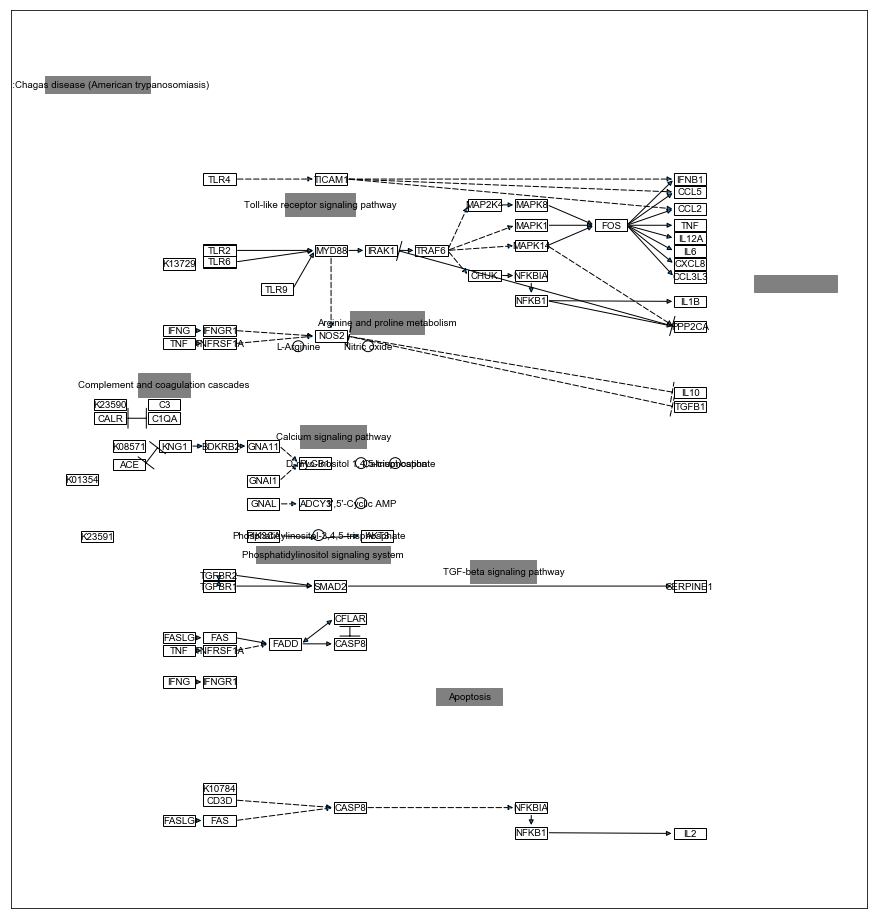

In [362]:
fig, ax = pathway.view(scale=1.5)


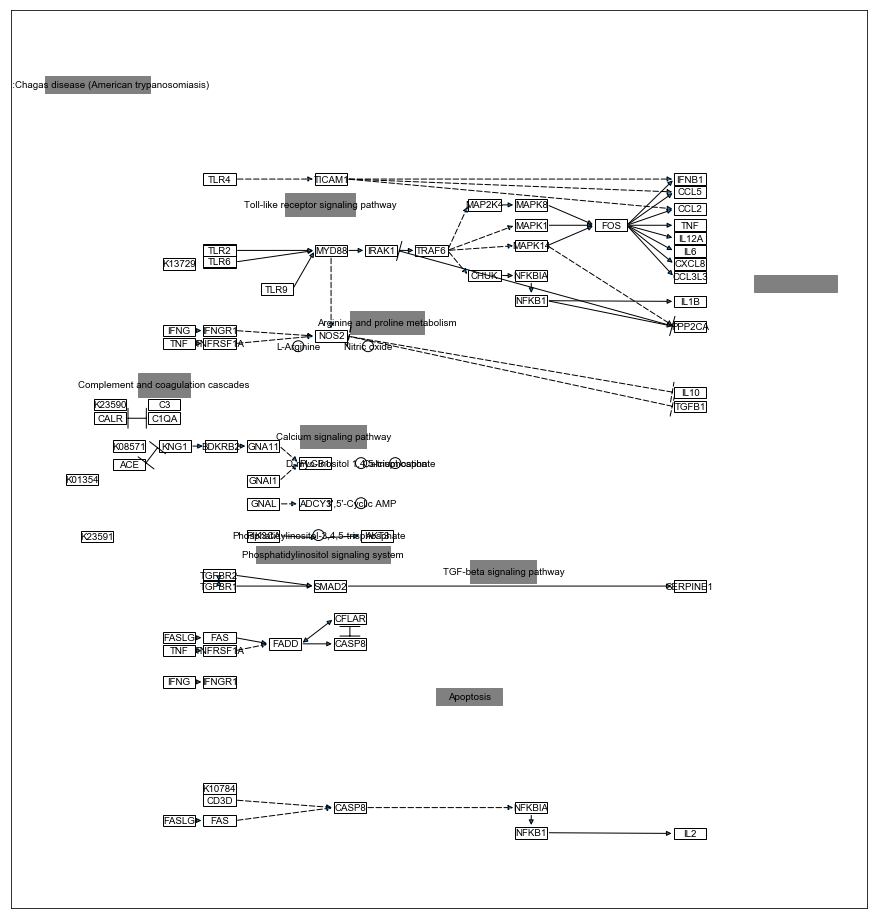

In [360]:
fig, ax = pathway.view(scale=1.5)


In [242]:
G = nx.from_pandas_edgelist(pathway.edge_attributes_df, 'source', 'target', edge_attr=True, create_using=nx.DiGraph())
G.add_nodes_from(pathway.entry_attributes_df.index)
nx.set_node_attributes(G, pathway.entry_attributes_df.to_dict('index'))

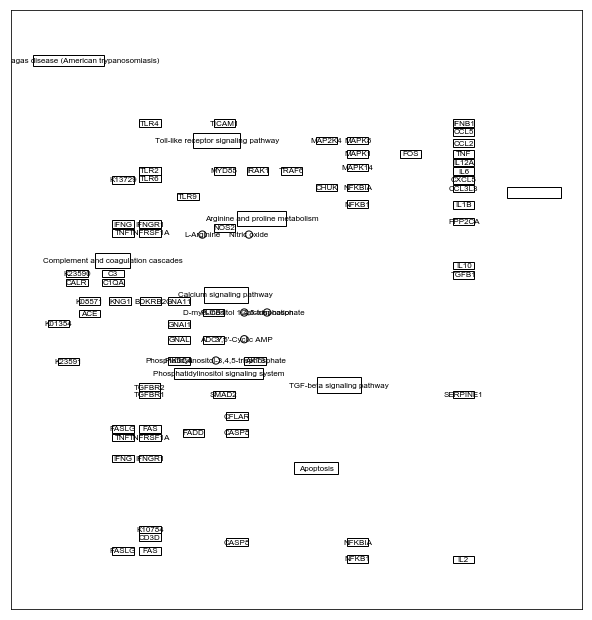

In [241]:
fig, ax = set_grid(pathway.entry_attributes_df)

## NODE MARKERS



for node,attribs in pathway.entry_attributes_df.to_dict('index').items(): 
    width, height = float(attribs['width']), float(attribs['height'])
    x = float(attribs['x']) - width / 2
    y = float(attribs['y']) - height / 2
    if attribs['type'] == 'compound': 
        ax.add_patch(matplotlib.patches.Circle(xy=(attribs['x'], attribs['y']), radius=width, color='k', fill=False))
    else: 
        ax.add_patch(matplotlib.patches.Rectangle(xy=(x,y), width=width, height=height, color='k', fill=False))
        
## LABELS
labels = nx.draw_networkx_labels(
    G, 
    pos = node_positions, 
    labels=pathway.entry_attributes_df['name'].to_dict(), 
    font_size=8
)

In [109]:
G = nx.from_pandas_edgelist(pathway.edge_attributes_df, 'source', 'target', edge_attr=True, create_using=nx.DiGraph())
G.add_nodes_from(pathway.entry_attributes_df.index)
nx.set_node_attributes(G, pathway.entry_attributes_df.to_dict('index'))

In [200]:
node_attribs = pathway.entry_attributes_df.copy()
node_attribs['x_pos'] = node_attribs['x'] - node_attribs['width'] / 2
node_attribs['y_pos'] = node_attribs['y'] - node_attribs['height'] / 2
node_attribs.head()

,name,aliases,type,x,y,height,width,shape,bgcolor,fgcolor,x_pos,y_pos
id,,,,,,,,,,,,
24,TLR2,"TLR2, CD282, TIL4",gene,291.0,302.0,17.0,46.0,rectangle,#BFFFBF,#000000,268.0,293.5
25,TLR4,"TLR4, ARMD10, CD284, TLR-4, TOLL",gene,291.0,197.0,17.0,46.0,rectangle,#BFFFBF,#000000,268.0,188.5
26,IFNG,"IFNG, IFG, IFI",gene,233.0,420.0,17.0,46.0,rectangle,#BFFFBF,#000000,210.0,411.5
27,K23590,K23590,ortholog,134.0,529.0,17.0,46.0,rectangle,#FFFFFF,#000000,111.0,520.5
28,CALR,"CALR, CRT, HEL-S-99n, RO, SSA, cC1qR",gene,134.0,549.0,17.0,46.0,rectangle,#BFFFBF,#000000,111.0,540.5


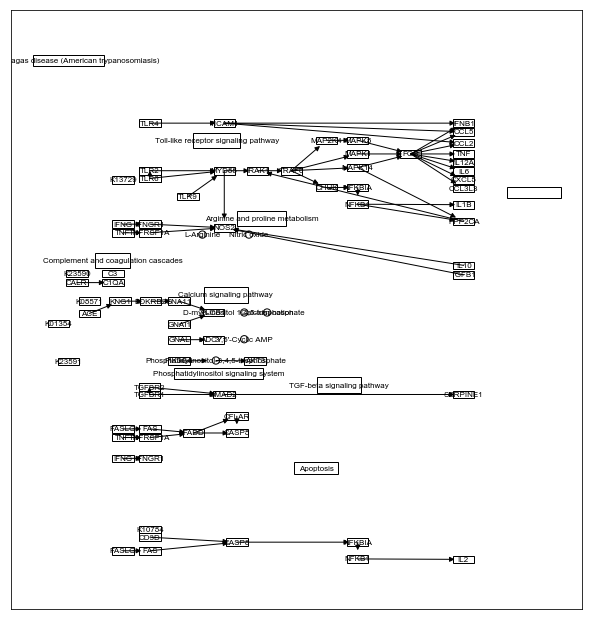

In [240]:
fig, ax = set_grid(pathway.entry_attributes_df)

node_positions = pathway.entry_attributes_df[['x', 'y']].astype(int).T.to_dict('list')

## Set view
x_min, x_max = pathway.entry_attributes_df.x.astype(float).agg(['min', 'max'])
y_min, y_max = pathway.entry_attributes_df.y.astype(float).agg(['min', 'max'])
x_pad = (x_max - x_min) * 0.1
y_pad = (y_max - y_min) * 0.1
ax.set(xlim=[x_min-x_pad, x_max+x_pad], ylim=[y_min-y_pad, y_max+y_pad])
ax.invert_yaxis()

## EDGE
edges = nx.draw_networkx_edges(
    G, 
    pos = node_positions
)

## NODE MARKERS
for node,attribs in pathway.entry_attributes_df.to_dict('index').items(): 
    width, height = float(attribs['width']), float(attribs['height'])
    x = float(attribs['x']) - width / 2
    y = float(attribs['y']) - height / 2
    if attribs['type'] == 'compound': 
        ax.add_patch(matplotlib.patches.Circle(xy=(attribs['x'], attribs['y']), radius=width, color='k', fill=False))
    else: 
        ax.add_patch(matplotlib.patches.Rectangle(xy=(x,y), width=width, height=height, color='k', fill=False))
        
## LABELS
labels = nx.draw_networkx_labels(
    G, 
    pos = node_positions, 
    labels=pathway.entry_attributes_df['name'].to_dict(), 
    font_size=8
)



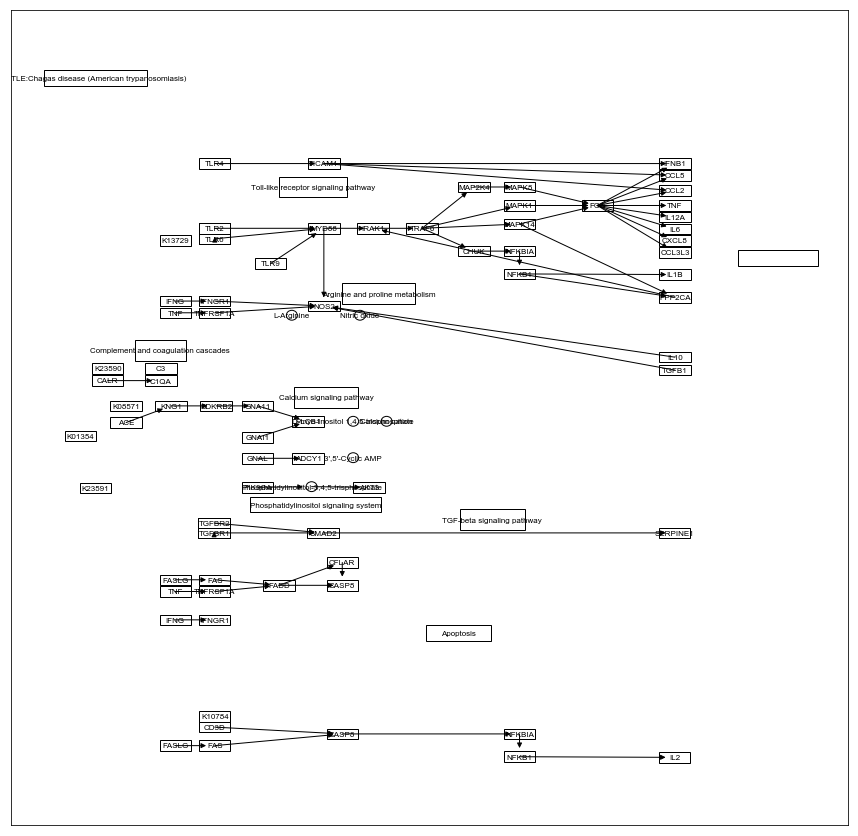

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(15,15), sharey=False)

node_positions = pathway.entry_attributes_df[['x', 'y']].astype(int).T.to_dict('list')

## Set view
x_min, x_max = pathway.entry_attributes_df.x.astype(float).agg(['min', 'max'])
y_min, y_max = pathway.entry_attributes_df.y.astype(float).agg(['min', 'max'])
x_pad = (x_max - x_min) * 0.1
y_pad = (y_max - y_min) * 0.1
ax.set(xlim=[x_min-x_pad, x_max+x_pad], ylim=[y_min-y_pad, y_max+y_pad])
ax.invert_yaxis()

## EDGE
edges = nx.draw_networkx_edges(
    G, 
    pos = node_positions
)

## NODE MARKERS
for node,attribs in pathway.entry_attributes_df.to_dict('index').items(): 
    width, height = float(attribs['width']), float(attribs['height'])
    x = float(attribs['x']) - width / 2
    y = float(attribs['y']) - height / 2
    if attribs['type'] == 'compound': 
        ax.add_patch(matplotlib.patches.Circle(xy=(attribs['x'], attribs['y']), radius=width, color='k', fill=False))
    else: 
        ax.add_patch(matplotlib.patches.Rectangle(xy=(x,y), width=width, height=height, color='k', fill=False))
        
## LABELS
labels = nx.draw_networkx_labels(
    G, 
    pos = node_positions, 
    labels=pathway.entry_attributes_df['name'].to_dict(), 
    font_size=8
)



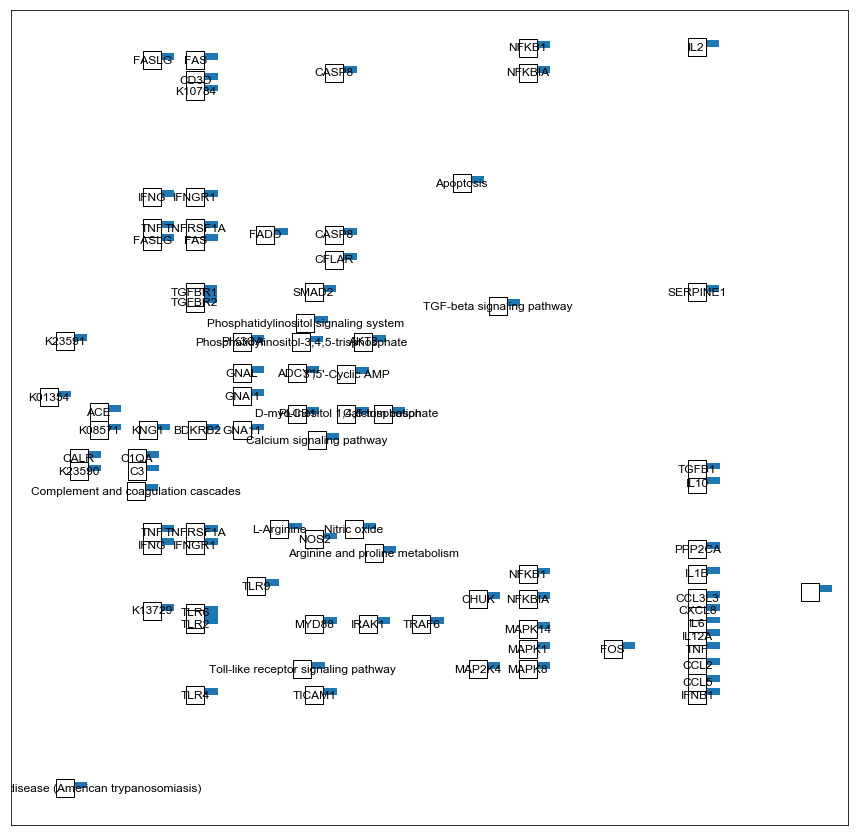

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(15,15), sharey=False)

node_positions = pathway.entry_attributes_df[['x', 'y']].astype(int).T.to_dict('list')

nodes = nx.draw_networkx_nodes(
    G, pos = node_positions, 
    node_color='w', node_shape='s'
)
nodes.set_edgecolor('k')

for a_x, a_y in list(node_positions.values()): 
    ax.add_patch(matplotlib.patches.Rectangle(xy=(a_x,a_y), width=30, height=10))

labels = nx.draw_networkx_labels(
    G, 
    pos = node_positions, 
    labels=pathway.entry_attributes_df['name'].to_dict()
)

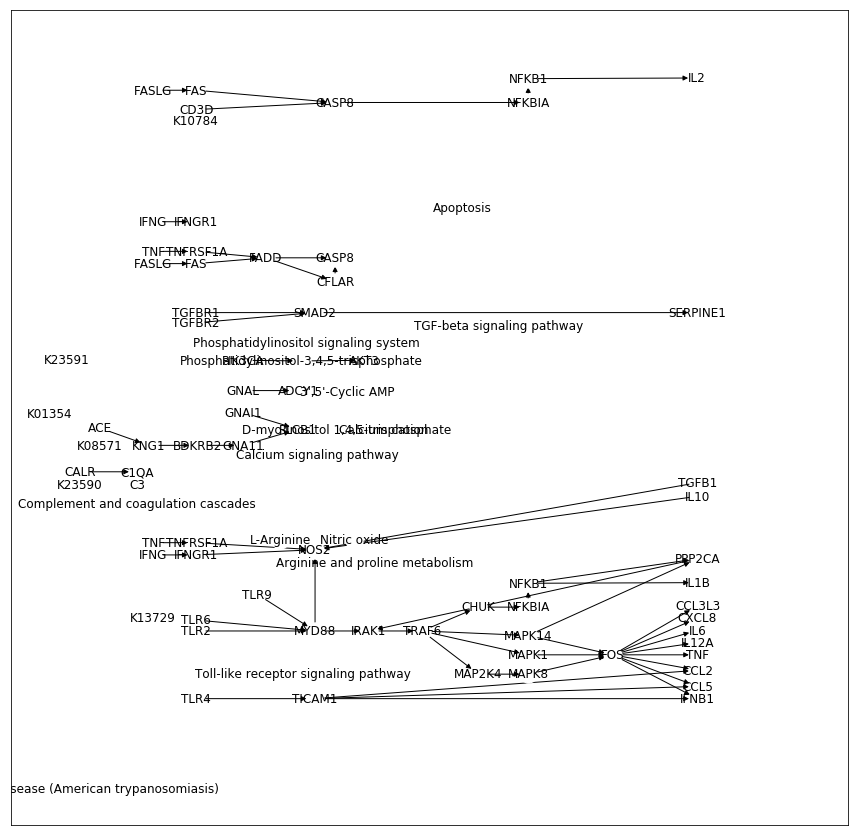

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(15,15), sharey=False)
    
nx.draw_networkx(
    G, 
    pos=pathway.entry_attributes_df[['x', 'y']].astype(int).T.to_dict('list'), 
    node_color='w', 
    labels=pathway.entry_attributes_df['name'].to_dict(), 
    linewidths=1, edge_color='k', 
    ax=ax
)

In [74]:
network = pathway.output_KGML_as_directed_networkx(genes_only=False)

In [79]:
pathway.entry_attributes_df

,name,aliases,type,x,y,height,width,shape,bgcolor,fgcolor
id,,,,,,,,,,
24,TLR2,"TLR2, CD282, TIL4",gene,291,302,17,46,rectangle,#BFFFBF,#000000
25,TLR4,"TLR4, ARMD10, CD284, TLR-4, TOLL",gene,291,197,17,46,rectangle,#BFFFBF,#000000
26,IFNG,"IFNG, IFG, IFI",gene,233,420,17,46,rectangle,#BFFFBF,#000000
27,K23590,K23590,ortholog,134,529,17,46,rectangle,#FFFFFF,#000000
28,CALR,"CALR, CRT, HEL-S-99n, RO, SSA, cC1qR",gene,134,549,17,46,rectangle,#BFFFBF,#000000
...,...,...,...,...,...,...,...,...,...,...
224,TITLE:Chagas disease (American trypanosomiasis),TITLE:Chagas disease (American trypanosomiasis),map,116,58,25,151,roundrectangle,#FFFFFF,#000000
225,KNG1,"KNG1, BDK, BK, HMWK, KNG",gene,227,590,17,46,rectangle,#BFFFBF,#000000
226,ACE,"ACE, ACE1, CD143, DCP, DCP1",gene,161,617,17,46,rectangle,#BFFFBF,#000000


In [76]:
pathway.node_attributes_df

,name,aliases,type,x,y,height,width,shape,bgcolor,fgcolor
id,,,,,,,,,,
24,TLR2,"TLR2, CD282, TIL4",gene,291,302,17,46,rectangle,#BFFFBF,#000000
25,TLR4,"TLR4, ARMD10, CD284, TLR-4, TOLL",gene,291,197,17,46,rectangle,#BFFFBF,#000000
26,IFNG,"IFNG, IFG, IFI",gene,233,420,17,46,rectangle,#BFFFBF,#000000
28,CALR,"CALR, CRT, HEL-S-99n, RO, SSA, cC1qR",gene,134,549,17,46,rectangle,#BFFFBF,#000000
29,C3,"C3, AHUS5, ARMD9, ASP, C3a, C3b, CPAMD1, HEL-S...",gene,212,529,17,46,rectangle,#BFFFBF,#000000
...,...,...,...,...,...,...,...,...,...,...
212,NFKB1,"NFKB1, CVID12, EBP-1, KBF1, NF-kB1, NF-kappa-B...",gene,738,1159,17,46,rectangle,#BFFFBF,#000000
217,IL2,"IL2, IL-2, TCGF, lymphokine",gene,965,1160,17,46,rectangle,#BFFFBF,#000000
221,TLR6,"TLR6, CD286",gene,291,319,17,46,rectangle,#BFFFBF,#000000


In [77]:
pathway.edge_attributes_df

,source,target,effect,indirect,modification,type
0,90,92,1,0,+p,PPrel
1,91,92,1,0,+p,PPrel
2,221,36,1,0,,PPrel
3,24,36,1,0,,PPrel
4,25,46,1,1,,PPrel
...,...,...,...,...,...,...
61,46,174,1,1,e,GErel
62,225,103,1,0,,PPrel
63,226,225,-1,0,,PPrel
64,221,24,2,0,,PComplex


In [ ]:
nx.readwrite.cytoscape_data

In [17]:
network = pathway.output_KGML_as_directed_networkx()
cyjs1 = cytoscape_data(network)

In [64]:
import json 

with open('/Users/johnny/Downloads/path:hsa05142_full_KEGG.cyjs') as f: 
    kegg = json.load(f)
    

with open('/Users/johnny/Downloads/styles.json') as f: 
    kegg_style = json.load(f)
    
style_obj = kegg_style[0]['style']

In [65]:
pathway.view(style_obj)

Cytoscape(data={'data': [('name', 'path:hsa05142')], 'directed': True, 'multigraph': False, 'elements': {'node…

In [32]:
Cytoscape(data=cyjs1, visual_style=style_obj, layout={'height': '700px'})

Cytoscape(data={'data': [('name', 'path:hsa05142')], 'directed': True, 'multigraph': False, 'elements': {'node…

In [20]:
from cyjupyter import Cytoscape
import networkx as nx
from networkx.readwrite import cytoscape_data

In [11]:
import json

with open('/Users/johnny/Downloads/hsa00020.cyjs') as f: 
    kegg = json.load(f)
    
with open('/Users/johnny/Downloads/kegg-styles.json') as f: 
    kegg_style = json.load(f)
    
style_obj = kegg_style[0]['style']

In [9]:
Cytoscape(data=kegg, visual_style=style_obj, layout={'heigh': '700px'})

Cytoscape(data={'format_version': '1.0', 'generated_by': 'cytoscape-3.6.1', 'target_cytoscapejs_version': '~2.…

In [42]:
cyjs1['elements']['edges']

[{'data': {'source': 0, 'target': 1, 'key': 0}},
 {'data': {'source': 1, 'target': 2, 'key': 0}},
 {'data': {'source': 2, 'target': 0, 'key': 0}}]

In [45]:
cyjs1['elements']['edges'].append({'data': {'source': 0, 'target': 0, 'key': 0}})

In [49]:
cyjs1['elements']['edges']

[{'data': {'source': 0, 'target': 1, 'key': 0}},
 {'data': {'source': 0, 'target': 1, 'key': 1}},
 {'data': {'source': 0, 'target': 1, 'key': 2}},
 {'data': {'source': 0, 'target': 1, 'key': 3}},
 {'data': {'source': 0, 'target': 1, 'key': 4}},
 {'data': {'source': 0, 'target': 1, 'key': 5}},
 {'data': {'source': 0, 'target': 1, 'key': 6}},
 {'data': {'source': 0, 'target': 1, 'key': 7}},
 {'data': {'source': 0, 'target': 4, 'key': 0}},
 {'data': {'source': 0, 'target': 2, 'key': 0}},
 {'data': {'source': 0, 'target': 0, 'key': 0}},
 {'data': {'source': 0, 'target': 0, 'key': 1}},
 {'data': {'source': 0, 'target': 8, 'key': 0}},
 {'data': {'source': 0, 'target': 6, 'key': 0}},
 {'data': {'source': 0, 'target': 5, 'key': 0}},
 {'data': {'source': 0, 'target': 5, 'key': 1}},
 {'data': {'source': 0, 'target': 5, 'key': 2}},
 {'data': {'source': 0, 'target': 7, 'key': 0}},
 {'data': {'source': 0, 'target': 19, 'key': 0}},
 {'data': {'source': 1, 'target': 2, 'key': 0}},
 {'data': {'source'

In [48]:
network1 = nx.scale_free_graph(20)
cyjs1 = cytoscape_data(network1)
Cytoscape(data=cyjs1, layout={'height': '700px'})

Cytoscape(data={'data': [], 'directed': True, 'multigraph': True, 'elements': {'nodes': [{'data': {'id': '0', …